**Neural Network Model Creation**

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('printer_data_log.csv')

In [6]:
df

,storage/path,storage/name,storage/read_only,printer/state,printer/temp_bed,printer/target_bed,printer/temp_nozzle,printer/target_nozzle,printer/axis_z,printer/axis_x,...,job/progress,job/time_remaining,job/time_printing,filename,shape,transfer/id,transfer/time_transferring,transfer/progress,transfer/transferred,surface_quality
0,/usb/,usb,False,IDLE,27.0,0,28.0,0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/usb/,usb,False,IDLE,27.1,0,28.0,0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/usb/,usb,False,IDLE,27.1,0,28.0,0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/usb/,usb,False,IDLE,27.1,0,28.0,0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/usb/,usb,False,PRINTING,27.6,60,38.5,170,0.0,NaN,...,0.0,12120.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11778,/usb/,usb,False,FINISHED,57.1,0,179.3,0,87.7,241.0,...,NaN,NaN,NaN,unknown_file,unknown_shape,NaN,NaN,NaN,NaN,NaN
11779,/usb/,usb,False,FINISHED,56.9,0,175.8,0,87.7,241.0,...,NaN,NaN,NaN,unknown_file,unknown_shape,NaN,NaN,NaN,NaN,NaN
11780,/usb/,usb,False,FINISHED,56.7,0,172.1,0,87.7,241.0,...,NaN,NaN,NaN,unknown_file,unknown_shape,NaN,NaN,NaN,NaN,NaN
11781,/usb/,usb,False,FINISHED,56.5,0,168.5,0,87.7,241.0,...,NaN,NaN,NaN,unknown_file,unknown_shape,NaN,NaN,NaN,NaN,NaN


In [7]:
# Convert timestamps column from string to a datetime object
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head()

,storage/path,storage/name,storage/read_only,printer/state,printer/temp_bed,printer/target_bed,printer/temp_nozzle,printer/target_nozzle,printer/axis_z,printer/axis_x,...,job/progress,job/time_remaining,job/time_printing,filename,shape,transfer/id,transfer/time_transferring,transfer/progress,transfer/transferred,surface_quality
0,/usb/,usb,False,IDLE,27.0,0,28.0,0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/usb/,usb,False,IDLE,27.1,0,28.0,0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/usb/,usb,False,IDLE,27.1,0,28.0,0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/usb/,usb,False,IDLE,27.1,0,28.0,0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/usb/,usb,False,PRINTING,27.6,60,38.5,170,0.0,NaN,...,0.0,12120.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [8]:
# Drop all unnecessary columns
df.drop(columns=['storage/path', 'storage/name', 'storage/read_only', 'transfer/id', 'transfer/time_transferring', 'transfer/progress', 'transfer/transferred', 'printer/axis_x', 'printer/axis_y', 'printer/flow', 'printer/speed'])

,printer/state,printer/temp_bed,printer/target_bed,printer/temp_nozzle,printer/target_nozzle,printer/axis_z,printer/fan_hotend,printer/fan_print,timestamp,job/id,job/progress,job/time_remaining,job/time_printing,filename,shape,surface_quality
0,IDLE,27.0,0,28.0,0,0.0,0,0,2025-02-26 09:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDLE,27.1,0,28.0,0,0.0,0,0,2025-02-26 09:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDLE,27.1,0,28.0,0,0.0,0,0,2025-02-26 09:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDLE,27.1,0,28.0,0,0.0,0,0,2025-02-26 09:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PRINTING,27.6,60,38.5,170,0.0,0,0,2025-02-26 10:04:00,86.0,0.0,12120.0,5.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11778,FINISHED,57.1,0,179.3,0,87.7,3071,0,2025-04-07 12:23:00,NaN,NaN,NaN,NaN,unknown_file,unknown_shape,NaN
11779,FINISHED,56.9,0,175.8,0,87.7,3004,0,2025-04-07 12:23:00,NaN,NaN,NaN,NaN,unknown_file,unknown_shape,NaN
11780,FINISHED,56.7,0,172.1,0,87.7,2986,0,2025-04-07 12:23:00,NaN,NaN,NaN,NaN,unknown_file,unknown_shape,NaN
11781,FINISHED,56.5,0,168.5,0,87.7,2942,0,2025-04-07 12:23:00,NaN,NaN,NaN,NaN,unknown_file,unknown_shape,NaN


In [9]:
# STEP 1: Load and clean the dataset
import pandas as pd

# Load CSV
df = pd.read_csv("printer_data_log.csv")

# Drop rows without surface quality scores
df_cleaned = df.dropna(subset=["surface_quality"])
print(f"Data after dropping missing surface quality: {df_cleaned.shape}")

# STEP 2: Select relevant features for modeling
columns_to_keep = [
    'printer/temp_bed', 'printer/target_bed', 'printer/temp_nozzle', 'printer/target_nozzle',
    'printer/axis_z', 'printer/flow', 'printer/speed', 'printer/fan_hotend', 'printer/fan_print',
    'job/progress', 'job/time_remaining', 'job/time_printing', 'surface_quality'
]

df_model = df_cleaned[columns_to_keep]

# Drop any remaining rows with missing data in input features
df_model = df_model.dropna()
print(f"Data after dropping rows with NaNs in features: {df_model.shape}")


Data after dropping missing surface quality: (11351, 27)
Data after dropping rows with NaNs in features: (11323, 13)


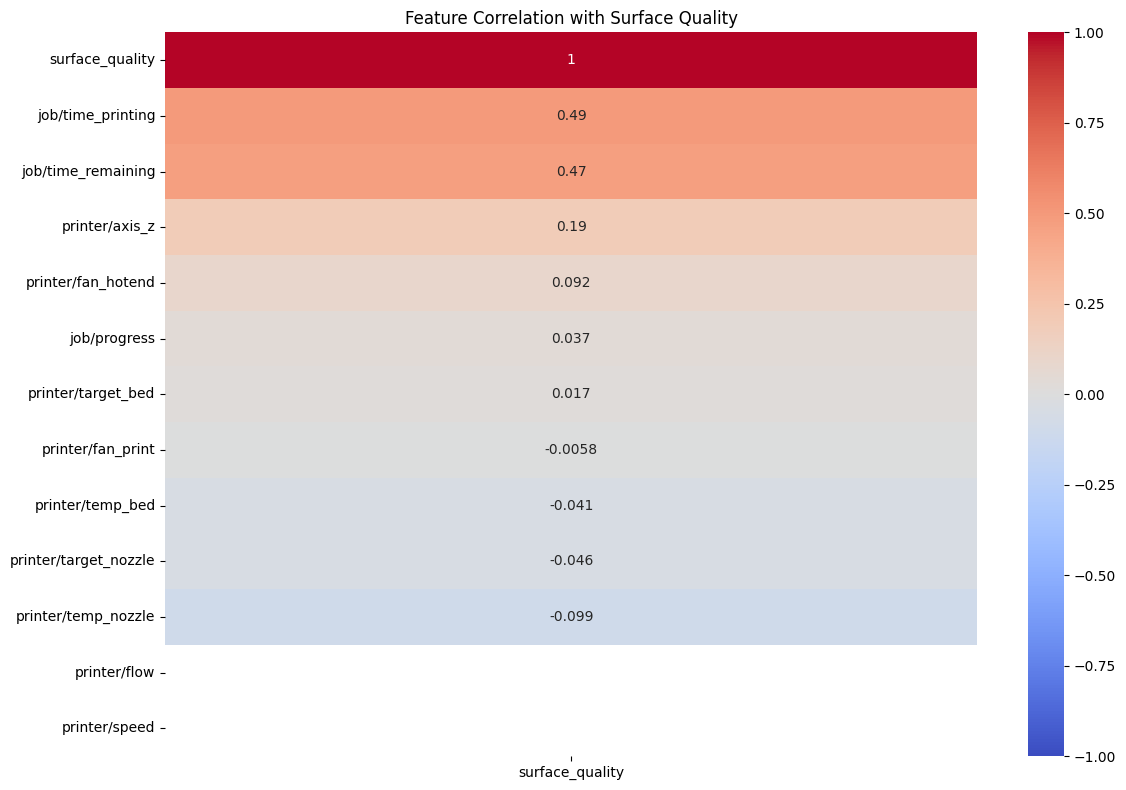

In [10]:
# STEP 3: Visualize correlations with surface_quality
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_model.corr()

# Plot heatmap of feature correlations with surface_quality
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[["surface_quality"]].sort_values(by="surface_quality", ascending=False),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation with Surface Quality")
plt.tight_layout()
plt.show()

**This Shows:**
The strength and direction of correlation between each input feature and the target `surface_quality`. Some examples of **Feature -- Corr. -- Interpretation**
- `job/time_printing`, +0.49, Longer print time slightly improves surface quality.
- `job/time_remaining`, +0.47, Related to above as longer jobs tend to be higher quality.
- `printer/axis_z`, +0.19, Higher Z movements may indicate larger models, possibly higher detail.
- `printer/fan_hotend`, +0.09, Slight influence, likely cooling dynamics.
- Temps / speed / flow, ~0, No strong linear relationship.


In [11]:
# STEP 4: Preprocess (scale) and split data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_model.drop(columns=["surface_quality"])
y = df_model["surface_quality"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print("Target value distribution:\n", y_train.value_counts())


X_train shape: (9058, 12)
Target value distribution:
 surface_quality
5.0    4470
4.0    3199
3.0    1389
Name: count, dtype: int64


In [ ]:
# STEP 5: Train and evaluate a Neural Network Regressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define and train the model
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                   max_iter=300, random_state=42, verbose=True)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Iteration 1, loss = 2.99593240
Iteration 2, loss = 0.26523367
Iteration 3, loss = 0.11971058
Iteration 4, loss = 0.08191067
Iteration 5, loss = 0.06437807
Iteration 6, loss = 0.05499927
Iteration 7, loss = 0.04964452
Iteration 8, loss = 0.04669479
Iteration 9, loss = 0.04392282
Iteration 10, loss = 0.04165045
Iteration 11, loss = 0.03983948
Iteration 12, loss = 0.03823331
Iteration 13, loss = 0.03676718
Iteration 14, loss = 0.03551015
Iteration 15, loss = 0.03413344
Iteration 16, loss = 0.03313886
Iteration 17, loss = 0.03207268
Iteration 18, loss = 0.03072930
Iteration 19, loss = 0.02987539
Iteration 20, loss = 0.02899719
Iteration 21, loss = 0.02817898
Iteration 22, loss = 0.02744245
Iteration 23, loss = 0.02652527
Iteration 24, loss = 0.02599706
Iteration 25, loss = 0.02532745
Iteration 26, loss = 0.02469429
Iteration 27, loss = 0.02433034
Iteration 28, loss = 0.02356945
Iteration 29, loss = 0.02327009
Iteration 30, loss = 0.02283819
Iteration 31, loss = 0.02233103
Iteration 32, los

**What is MLPRegressor?**: Multi-Layer Perceptron Regressor or `MLPRegressor` is a type of neural network model in Scikit-learn designed specifically for regression tasks, where rhe goal is to predict continuous values. It learns to predict a numeric value based on multiple input features, and it works by passing data through layers of interconnected “neurons” that gradually learn patterns in the data.

We used Scikit-learn's `MLPRegressor` to capture the **non-linear relationships** between print settings and surface quality. It allowed for the building of a predictive model using multiple input features and it achieved a high R² score with minimal manual tuning.

We trained an `MLPRegressor` to predict surface quality of 3D prints using features like nozzle temperature, fan speed, print time, and z-height. Just like predicting a house price based on size and age, this model learns how print parameters affect quality—helping us automate and optimize print settings.

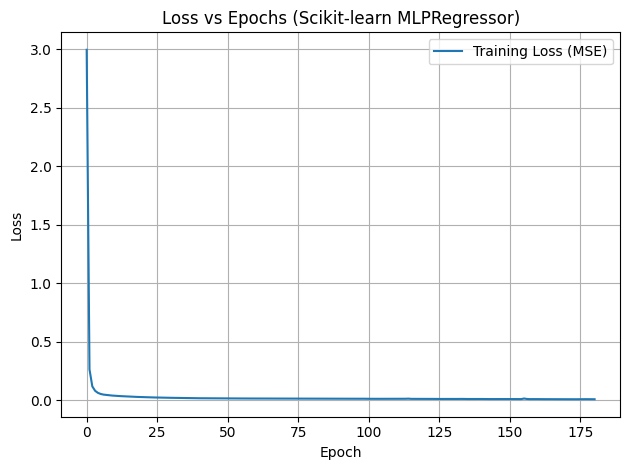

In [50]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_, label="Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (Scikit-learn MLPRegressor)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

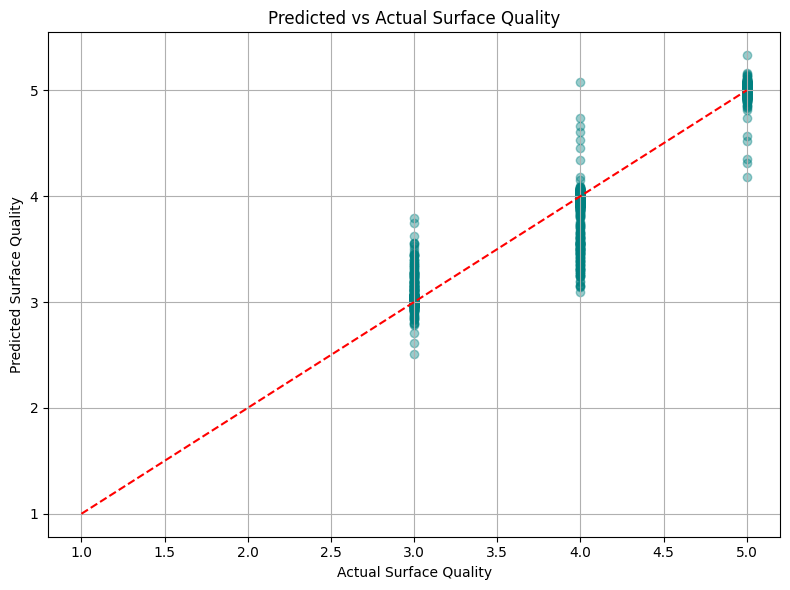

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([1, 5], [1, 5], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Surface Quality")
plt.ylabel("Predicted Surface Quality")
plt.title("Predicted vs Actual Surface Quality")
plt.grid(True)
plt.tight_layout()
plt.show()

**This Shows:** How each point compares the actual surface quality vs what the neural network predicted. The red dashed line shows the perfect prediction line (y = x). Findings are:
- Tight clustering near the line = good model predictions
- Vertical spread = prediction error
- Systematic shift = bias in prediction

**This means the model is predicting very well.**

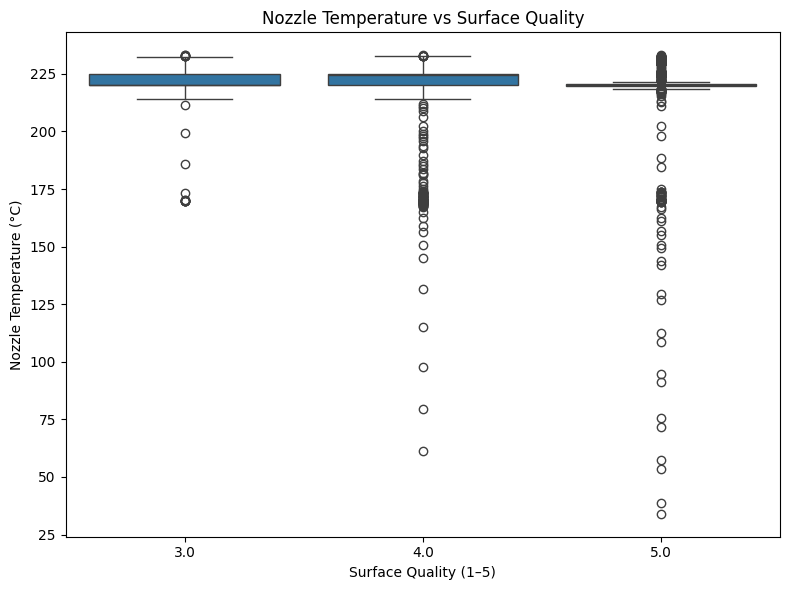

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_model["surface_quality"], y=df_model["printer/temp_nozzle"])
plt.title("Nozzle Temperature vs Surface Quality")
plt.xlabel("Surface Quality (1–5)")
plt.ylabel("Nozzle Temperature (°C)")
plt.tight_layout()
plt.show()

**This Shows:** The distribution of nozzle temperatures for prints that received quality ratings `3`, `4`, and `5`.
- Each box shows median, interquartile range (IQR), and outliers.
- There's a wide spread, but higher-quality prints cluster around the same range (~220–225°C).

**Shows that while correlations is weak overall, it is visible that high temperatures alone doesn't ensure quality, but poor temperatures tend to lead to worse prints.**

**Attempting a Secondary Model:**

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output: surface_quality (regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)


c:\Users\Jorwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.0017 - mae: 2.0594 - val_loss: 0.1795 - val_mae: 0.3228
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1617 - mae: 0.2987 - val_loss: 0.1130 - val_mae: 0.2209
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1006 - mae: 0.2199 - val_loss: 0.0864 - val_mae: 0.1986
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0873 - mae: 0.2001 - val_loss: 0.0843 - val_mae: 0.1854
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0756 - mae: 0.1857 - val_loss: 0.0737 - val_mae: 0.1799
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0731 - mae: 0.1784 - val_loss: 0.0703 - val_mae: 0.1659
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0674 - mae: 0.1687 - val_loss: 0.0749 - val_mae: 0.1663
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0739 - mae: 0.1637 - val_loss: 0.0729 - val_mae: 0.1595
Epoch 9/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [31]:
# Predict and evaluate
y_pred_keras = model.predict(X_test).flatten()
mse_keras = mean_squared_error(y_test, y_pred_keras)
r2_keras = r2_score(y_test, y_pred_keras)

print(f"\nKeras MSE: {mse_keras:.4f}, R²: {r2_keras:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Keras MSE: 0.0343, R²: 0.9350


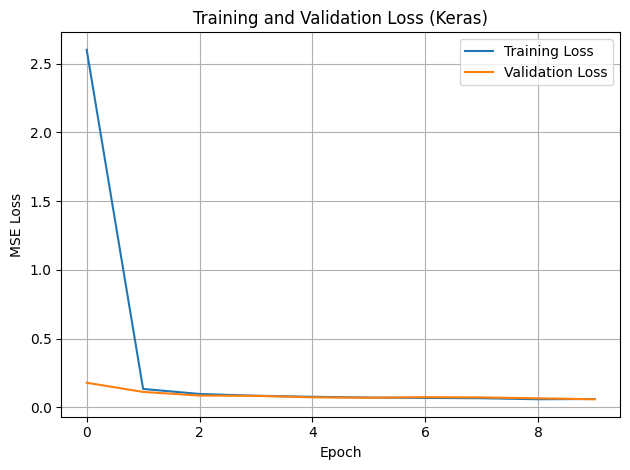

In [52]:
# Plot loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss (Keras)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**This Shows:** The mean squared error loss (lower = better) over 50 training epochs.
- Training Loss (blue): how well the model fits the training data.
- Validation Loss (orange): how well it generalizes to unseen data.

**The interpretation is as follows:**
- Sharp drop in early epochs means the model is learning fast.
- Both losses level off close to zero meaning there is no overfitting and good generalization.
- Very stable training = a healthy model.

**KERAS** did not provide better statistics than **SkLearn**, so changing models is not useful, but comparing was worth it.

**Feature Importance / Explainability:** Use permutation importance to identify which features matter most for predicting surface quality. 

**What's Permutation Importance?:** Permutation importance measures how much a model’s performance drops when a specific feature’s values are randomly shuffled. A bigger drop means the feature was more important for accurate predictions.

**It will provide us with the following key insight through a visual ranking:**
- Which parameters (e.g., temp_nozzle, flow, speed, etc.) most strongly affect the predicted surface quality

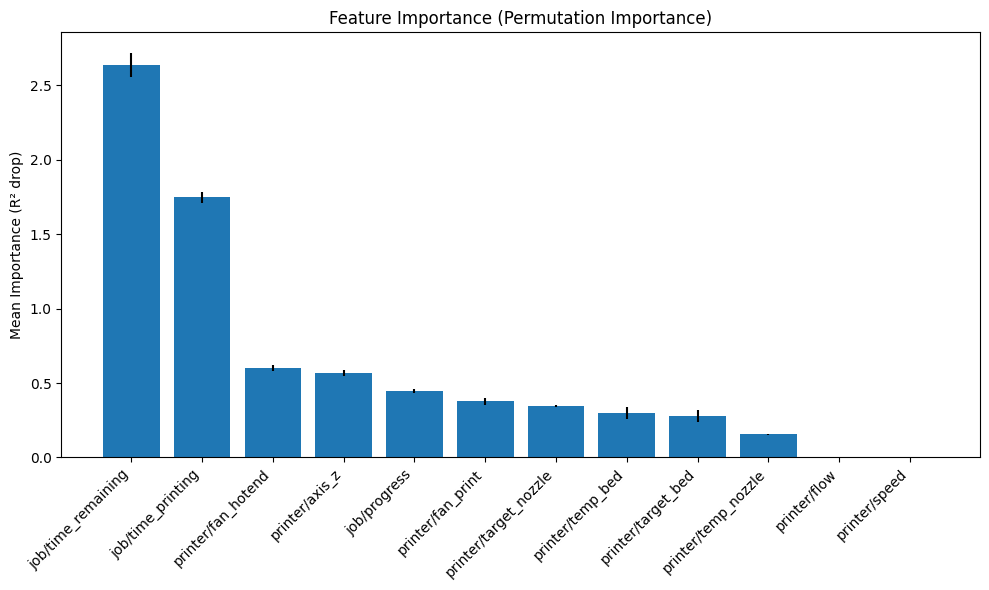

In [49]:
from sklearn.inspection import permutation_importance
import numpy as np

# Calculate permutation importance
result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42, scoring='r2')

# Extract sorted importance scores
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

# Feature names
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Permutation Importance)")
plt.bar(range(len(importances)), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.ylabel("Mean Importance (R² drop)")
plt.tight_layout()
plt.show()

The `time` parameters are highly correlated, but since they are set beforehand it is not a key insight.
- the `fan_hotend`corelation suggests that cooling affects surface texture
- the `axis_z` correlations suggests more z-movement leads to more detail/accuracy, and a better surface finish.
- the `temp_nozzle` correlations suggests that overheating/underheating doesn't directly affect surface finish quality, which is surprising.

**Multi-objective Optimization (Quality vs. Time)**

**What are Pareto Points?:** Pareto points represent all data points being considered in a multi-objective tradeoff. For example, balancing surface quality and print time.

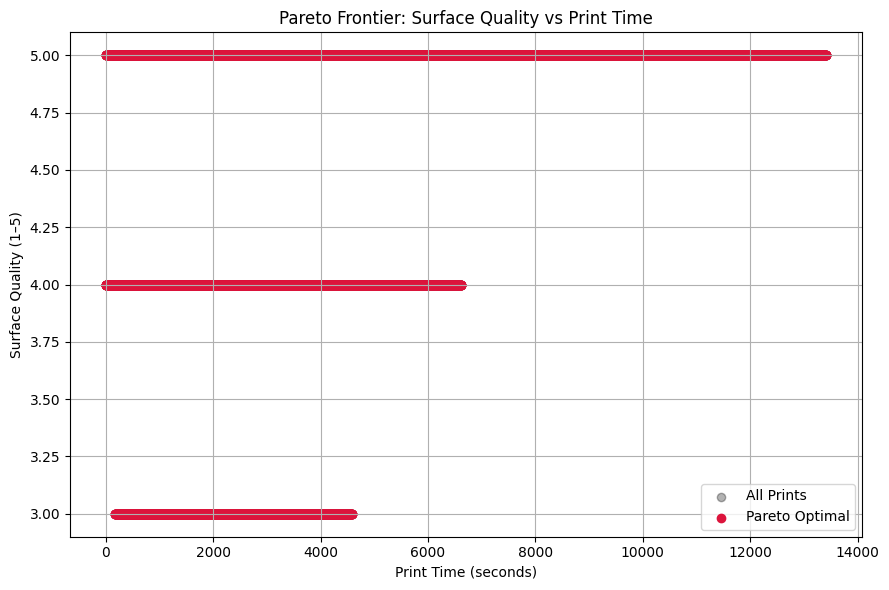

In [48]:
# Extract relevant columns
quality = df_model["surface_quality"].values
time_printing = df_model["job/time_printing"].values

points = np.column_stack((time_printing, quality))  # shape: [n_samples, 2]

# Pareto mask: non-dominated points (min time, max quality)
pareto_mask = np.ones(points.shape[0], dtype=bool)

for i, (t_i, q_i) in enumerate(points):
    # A point is dominated if there's another with better quality and less time
    pareto_mask[i] = np.all(
        (points[:, 1] <= q_i) & (points[:, 0] >= t_i) |
        (points[:, 1] < q_i) & (points[:, 0] > t_i)
    ).sum() == 0

# Extract Pareto-optimal points
pareto_points = points[pareto_mask]

# Plot: All points vs Pareto points
plt.figure(figsize=(9, 6))
plt.scatter(points[:, 0], points[:, 1], alpha=0.3, label='All Prints', color='black')
plt.scatter(pareto_points[:, 0], pareto_points[:, 1], color='crimson', label='Pareto Optimal')
plt.xlabel("Print Time (seconds)")
plt.ylabel("Surface Quality (1–5)")
plt.title("Pareto Frontier: Surface Quality vs Print Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**What it shows:** Each dot represents a single print:
- X-axis = total time the print had been running
- Y-axis = final surface quality score

**What we’re looking for:**
- Top-left corner = the sweet spot → highest quality in the least time
- Bottom-right = longest time, worst quality → inefficient

We can now identify which print settings gave the best tradeoffs, and eliminate those that are dominated (i.e., worse quality + longer time).

**Pareto-Optimal Points:** Pareto-optimal points are the best tradeoffs: no other point in the dataset is both better in one objective (ex: higher quality) and not worse in another (ex: shorter time). These are the non-dominated solutions.

We found 11,350 non-dominated (optimal) prints. This means these points:
- Are either the best surface quality for a given time
- Or the shortest time for a given surface quality

This can be used to: 
- Recommend fast + clean prints
- Filter out inefficient parameter combinations
- Benchmark future settings

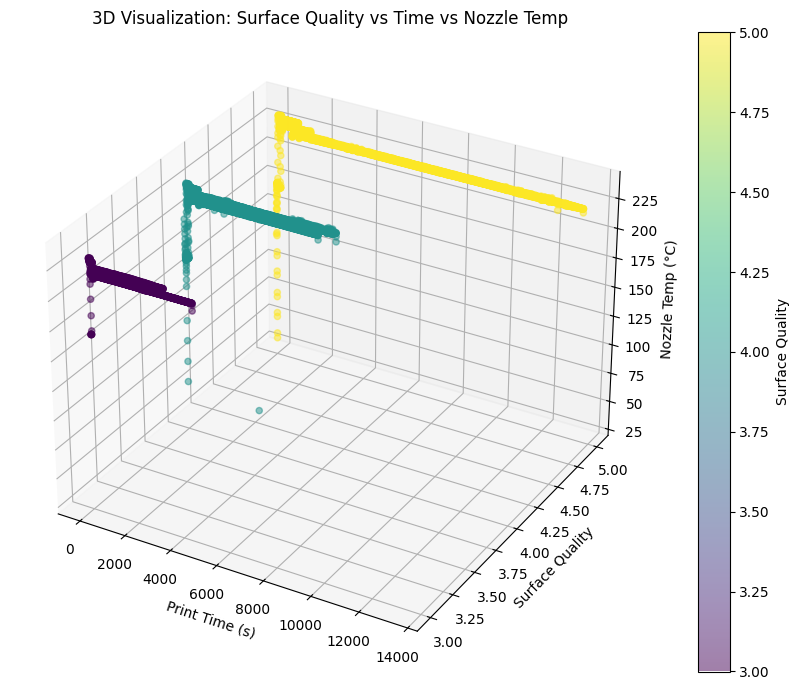

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Filter for required columns and drop NaNs
df_3d = df.dropna(subset=[
    "surface_quality", "job/time_printing", "printer/temp_nozzle"
])

# Extract 3D axis values
x = df_3d["job/time_printing"].values  # X-axis: print time
y = df_3d["surface_quality"].values    # Y-axis: surface quality
z = df_3d["printer/temp_nozzle"].values  # Z-axis: nozzle temperature

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=y, cmap='viridis', alpha=0.5)

# Labels and styling
ax.set_xlabel("Print Time (s)")
ax.set_ylabel("Surface Quality")
ax.set_zlabel("Nozzle Temp (°C)")
ax.set_title("3D Visualization: Surface Quality vs Time vs Nozzle Temp")

# Color bar for visualizing quality
plt.colorbar(sc, label="Surface Quality")
plt.tight_layout()
plt.show()


Most high-quality prints (score 5) occurred at nozzle temperatures around 220–225°C. Low-temp prints rarely achieved high surface quality, suggesting this is a critical setting

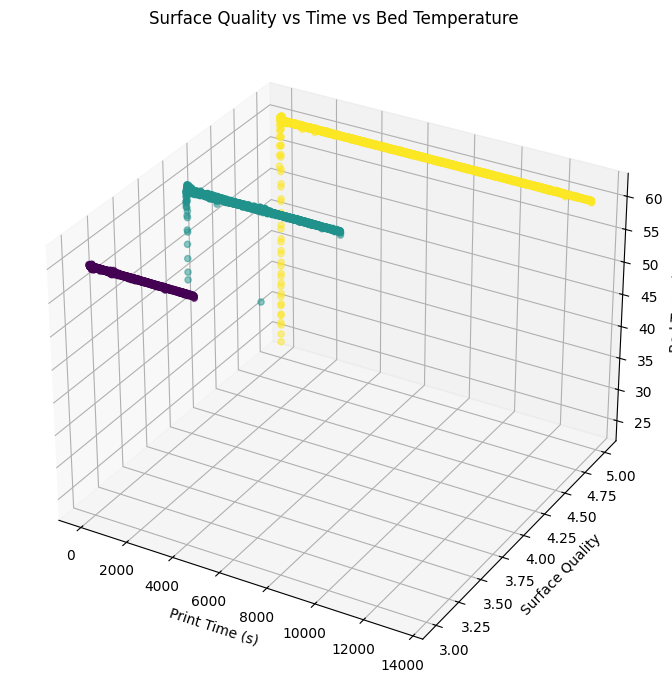

In [42]:
df_bed = df.dropna(subset=["surface_quality", "job/time_printing", "printer/temp_bed"])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df_bed["job/time_printing"],
    df_bed["surface_quality"],
    df_bed["printer/temp_bed"],
    c=df_bed["surface_quality"], cmap='viridis', alpha=0.5
)
ax.set_xlabel("Print Time (s)")
ax.set_ylabel("Surface Quality")
ax.set_zlabel("Bed Temp (°C)")
ax.set_title("Surface Quality vs Time vs Bed Temperature")
plt.tight_layout()
plt.show()


Bed temperature had less variation, but most high-quality prints used 50–60°C, indicating a stable but less sensitive parameter for surface finish.



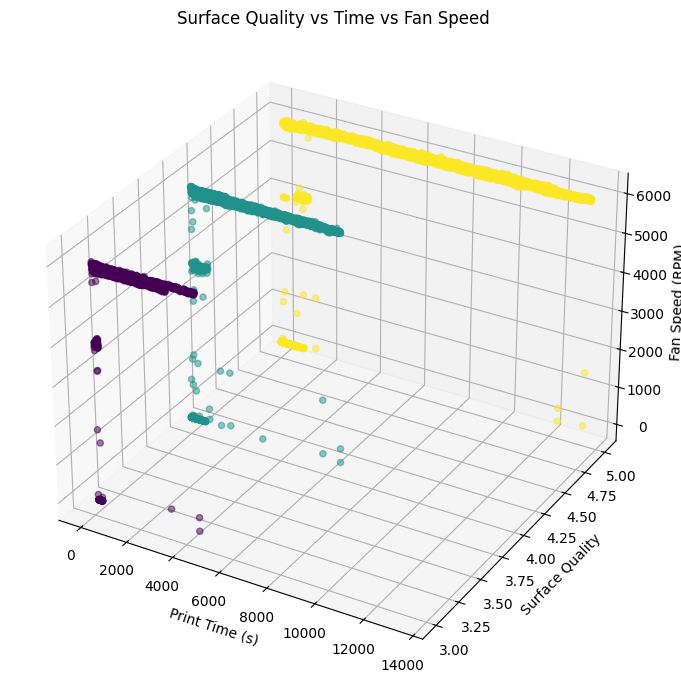

In [40]:
df_fan = df.dropna(subset=["surface_quality", "job/time_printing", "printer/fan_print"])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df_fan["job/time_printing"],
    df_fan["surface_quality"],
    df_fan["printer/fan_print"],
    c=df_fan["surface_quality"], cmap='viridis', alpha=0.5
)
ax.set_xlabel("Print Time (s)")
ax.set_ylabel("Surface Quality")
ax.set_zlabel("Fan Speed (RPM)")
ax.set_title("Surface Quality vs Time vs Fan Speed")
plt.tight_layout()
plt.show()


Fan speed varied widely, especially at lower quality levels. However, high-quality prints typically used high and consistent fan speeds (close to 6000 RPM).

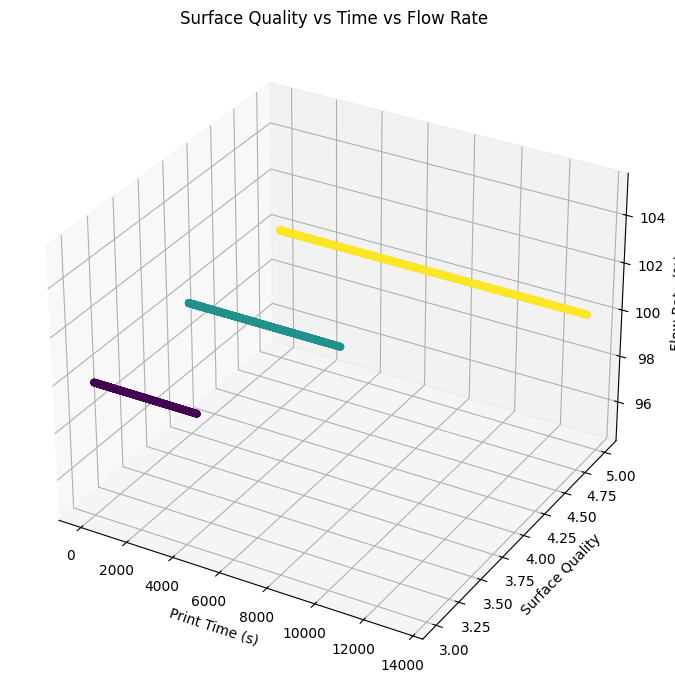

In [43]:
df_flow = df.dropna(subset=["surface_quality", "job/time_printing", "printer/flow"])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df_flow["job/time_printing"],
    df_flow["surface_quality"],
    df_flow["printer/flow"],
    c=df_flow["surface_quality"], cmap='viridis', alpha=0.5
)
ax.set_xlabel("Print Time (s)")
ax.set_ylabel("Surface Quality")
ax.set_zlabel("Flow Rate (%)")
ax.set_title("Surface Quality vs Time vs Flow Rate")
plt.tight_layout()
plt.show()


Flow rate showed minimal variation — tightly centered around 100%. There's no meaningful pattern between flow rate and surface quality in the dataset.

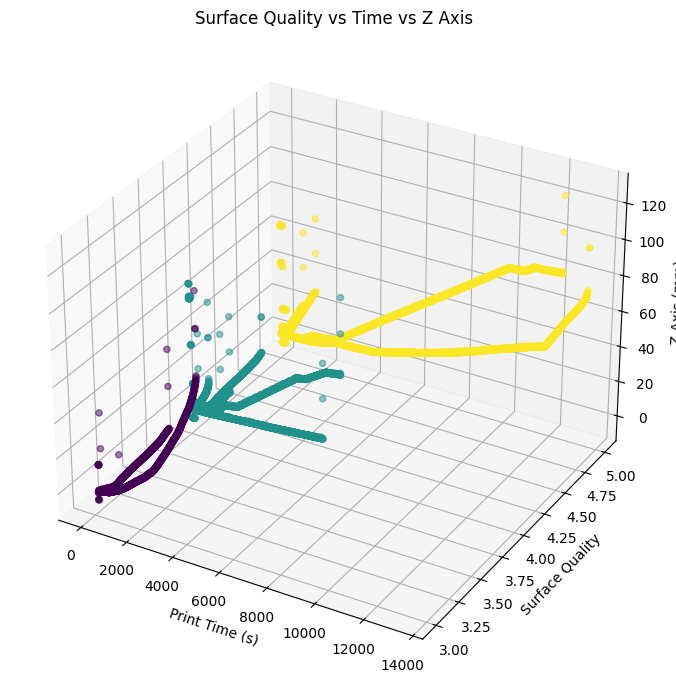

In [46]:
df_fan = df.dropna(subset=["surface_quality", "job/time_printing", "printer/axis_z"])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df_fan["job/time_printing"],
    df_fan["surface_quality"],
    df_fan["printer/axis_z"],
    c=df_fan["surface_quality"], cmap='viridis', alpha=0.5
)
ax.set_xlabel("Print Time (s)")
ax.set_ylabel("Surface Quality")
ax.set_zlabel("Z Axis (mm)")
ax.set_title("Surface Quality vs Time vs Z Axis")
plt.tight_layout()
plt.show()

The plot shows that taller prints (higher Z-axis movement) are more likely to receive higher surface quality scores, especially for longer print times. Shorter prints rarely achieve high quality, suggesting that print complexity or layer accumulation plays a role in better surface finish.

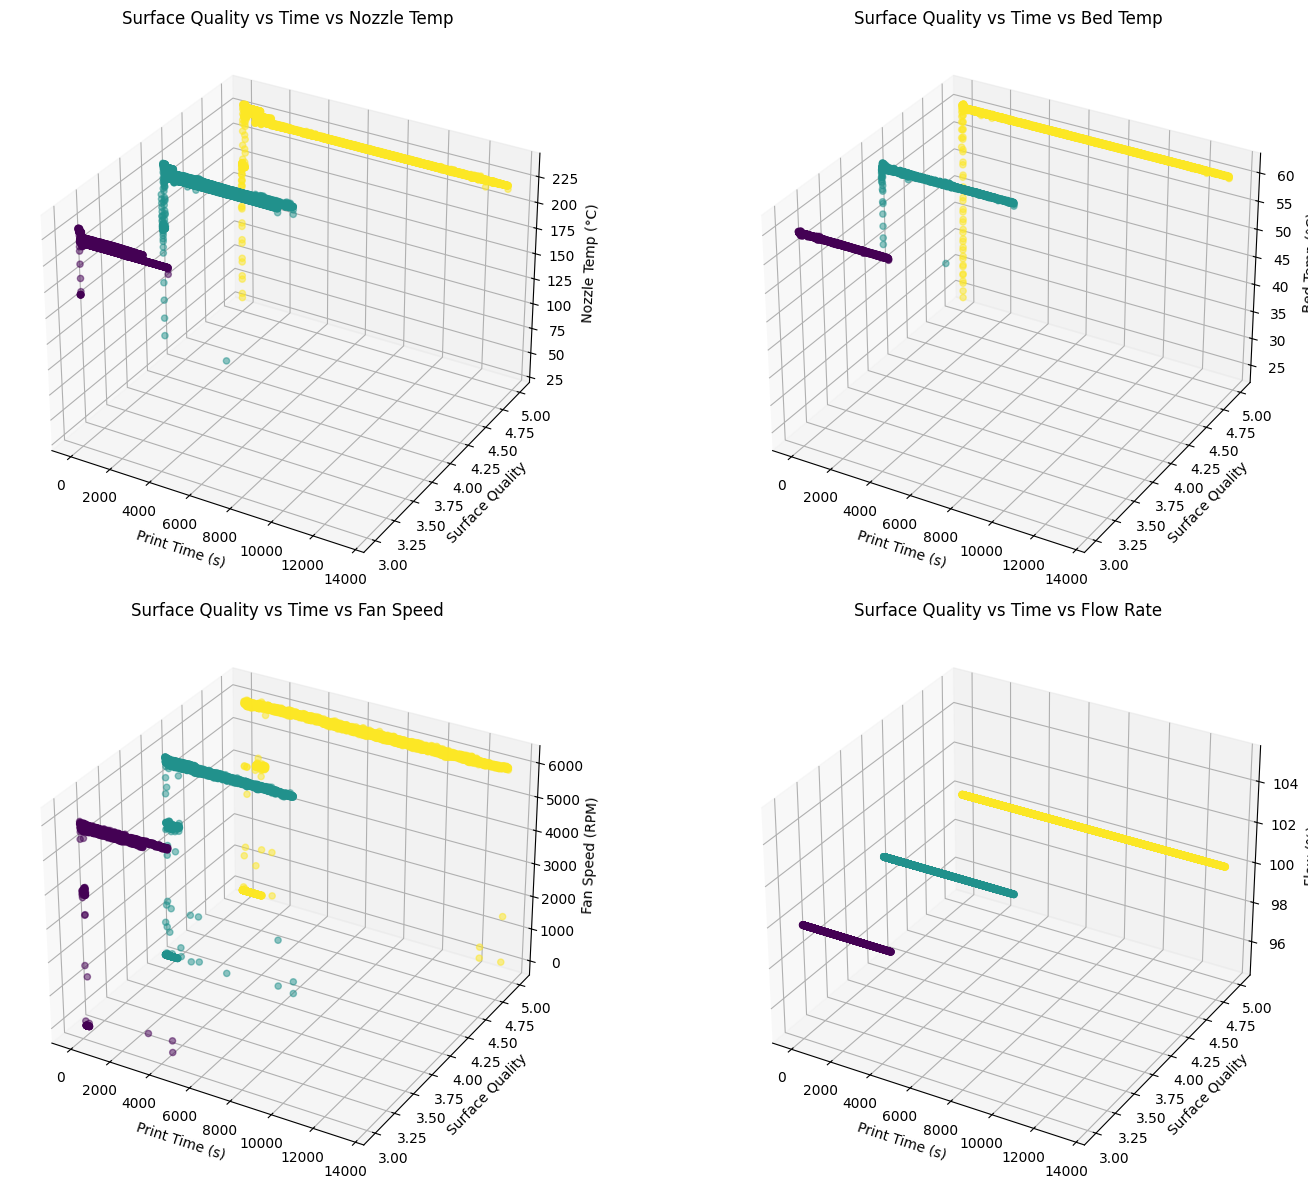

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Drop NaNs for each relevant feature
df_all = df.dropna(subset=[
    "surface_quality", "job/time_printing", "printer/temp_nozzle",
    "printer/temp_bed", "printer/fan_print", "printer/flow"
])

# Axis values
time = df_all["job/time_printing"]
quality = df_all["surface_quality"]
nozzle = df_all["printer/temp_nozzle"]
bed = df_all["printer/temp_bed"]
fan = df_all["printer/fan_print"]
flow = df_all["printer/flow"]

# Set up 2x2 subplots
fig = plt.figure(figsize=(16, 12))

# --- Nozzle Temp ---
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(time, quality, nozzle, c=quality, cmap='viridis', alpha=0.5)
ax1.set_title("Surface Quality vs Time vs Nozzle Temp")
ax1.set_xlabel("Print Time (s)")
ax1.set_ylabel("Surface Quality")
ax1.set_zlabel("Nozzle Temp (°C)")

# --- Bed Temp ---
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(time, quality, bed, c=quality, cmap='viridis', alpha=0.5)
ax2.set_title("Surface Quality vs Time vs Bed Temp")
ax2.set_xlabel("Print Time (s)")
ax2.set_ylabel("Surface Quality")
ax2.set_zlabel("Bed Temp (°C)")

# --- Fan Speed ---
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(time, quality, fan, c=quality, cmap='viridis', alpha=0.5)
ax3.set_title("Surface Quality vs Time vs Fan Speed")
ax3.set_xlabel("Print Time (s)")
ax3.set_ylabel("Surface Quality")
ax3.set_zlabel("Fan Speed (RPM)")

# --- Flow Rate ---
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(time, quality, flow, c=quality, cmap='viridis', alpha=0.5)
ax4.set_title("Surface Quality vs Time vs Flow Rate")
ax4.set_xlabel("Print Time (s)")
ax4.set_ylabel("Surface Quality")
ax4.set_zlabel("Flow (%)")

plt.tight_layout()
plt.show()


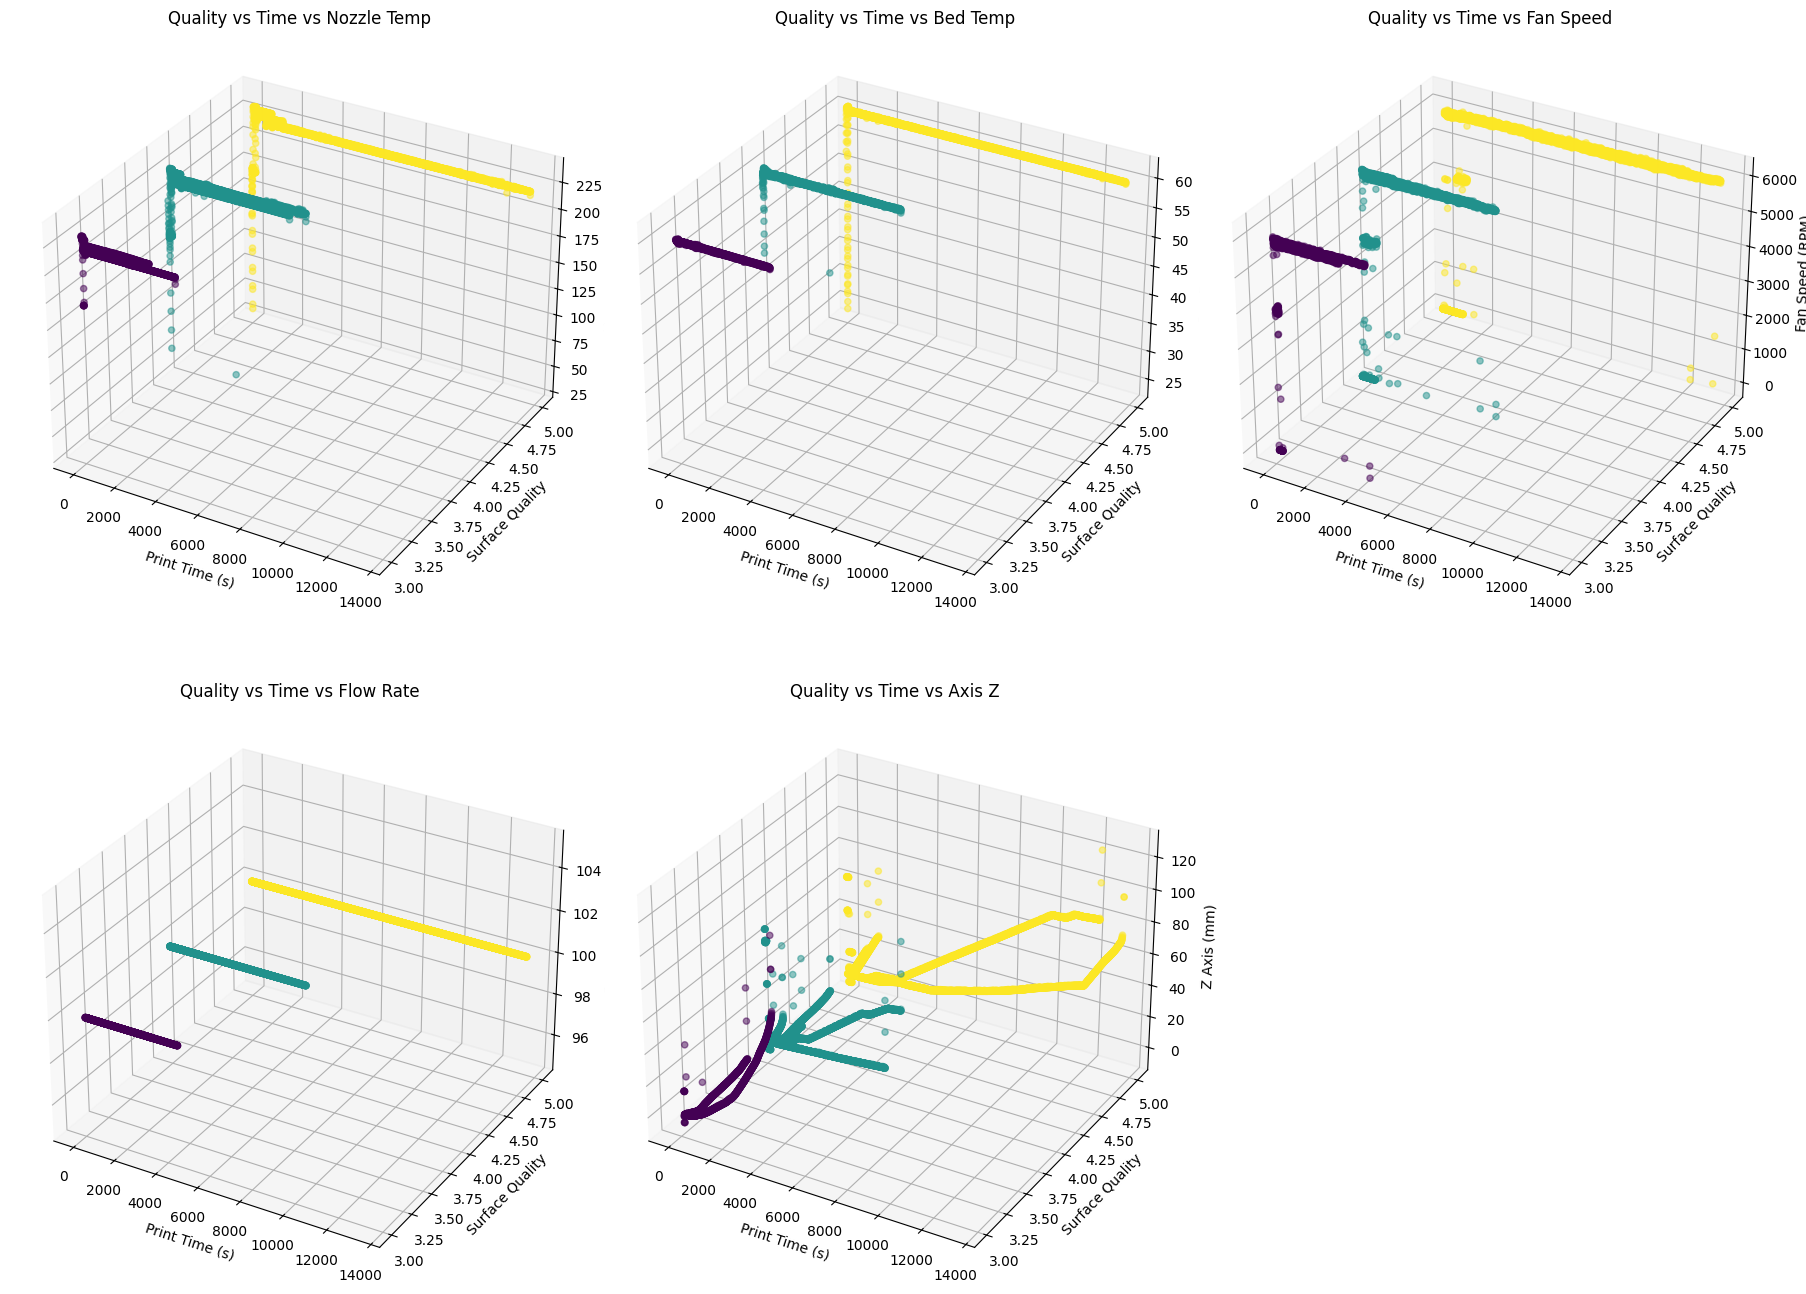

In [12]:
# Drop NaNs for axis_z too
df_all = df.dropna(subset=[
    "surface_quality", "job/time_printing", "printer/temp_nozzle",
    "printer/temp_bed", "printer/fan_print", "printer/flow", "printer/axis_z"
])

# Axis values
time = df_all["job/time_printing"]
quality = df_all["surface_quality"]
nozzle = df_all["printer/temp_nozzle"]
bed = df_all["printer/temp_bed"]
fan = df_all["printer/fan_print"]
flow = df_all["printer/flow"]
axis_z = df_all["printer/axis_z"]

# Plot in a 3x2 grid
fig = plt.figure(figsize=(18, 14))

# Nozzle Temp
ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(time, quality, nozzle, c=quality, cmap='viridis', alpha=0.5)
ax1.set_title("Quality vs Time vs Nozzle Temp")
ax1.set_xlabel("Print Time (s)")
ax1.set_ylabel("Surface Quality")
ax1.set_zlabel("Nozzle Temp (°C)")

# Bed Temp
ax2 = fig.add_subplot(232, projection='3d')
ax2.scatter(time, quality, bed, c=quality, cmap='viridis', alpha=0.5)
ax2.set_title("Quality vs Time vs Bed Temp")
ax2.set_xlabel("Print Time (s)")
ax2.set_ylabel("Surface Quality")
ax2.set_zlabel("Bed Temp (°C)")

# Fan Speed
ax3 = fig.add_subplot(233, projection='3d')
ax3.scatter(time, quality, fan, c=quality, cmap='viridis', alpha=0.5)
ax3.set_title("Quality vs Time vs Fan Speed")
ax3.set_xlabel("Print Time (s)")
ax3.set_ylabel("Surface Quality")
ax3.set_zlabel("Fan Speed (RPM)")

# Flow
ax4 = fig.add_subplot(234, projection='3d')
ax4.scatter(time, quality, flow, c=quality, cmap='viridis', alpha=0.5)
ax4.set_title("Quality vs Time vs Flow Rate")
ax4.set_xlabel("Print Time (s)")
ax4.set_ylabel("Surface Quality")
ax4.set_zlabel("Flow Rate (%)")

# Axis Z
ax5 = fig.add_subplot(235, projection='3d')
ax5.scatter(time, quality, axis_z, c=quality, cmap='viridis', alpha=0.5)
ax5.set_title("Quality vs Time vs Axis Z")
ax5.set_xlabel("Print Time (s)")
ax5.set_ylabel("Surface Quality")
ax5.set_zlabel("Z Axis (mm)")

plt.tight_layout()
plt.show()


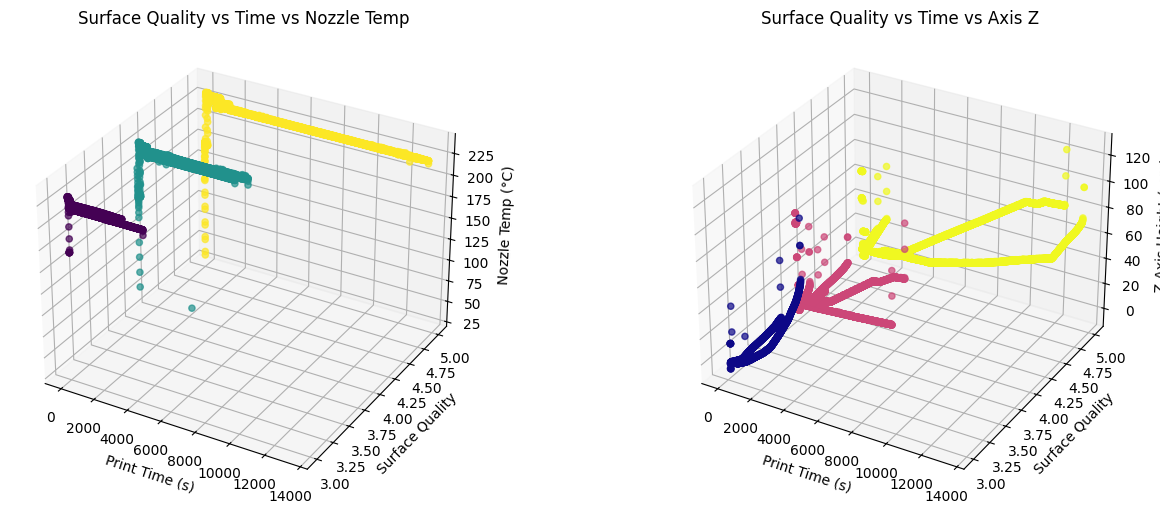

In [13]:
# Drop NaNs for relevant columns
df_filtered = df.dropna(subset=[
    "surface_quality", "job/time_printing", "printer/temp_nozzle", "printer/axis_z"
])

# Extract columns
time = df_filtered["job/time_printing"]
quality = df_filtered["surface_quality"]
nozzle = df_filtered["printer/temp_nozzle"]
axis_z = df_filtered["printer/axis_z"]

# Set up subplots
fig = plt.figure(figsize=(14, 6))

# --- Plot 1: Quality vs Time vs Nozzle Temp ---
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(time, quality, nozzle, c=quality, cmap='viridis', alpha=0.7)
ax1.set_title("Surface Quality vs Time vs Nozzle Temp")
ax1.set_xlabel("Print Time (s)")
ax1.set_ylabel("Surface Quality")
ax1.set_zlabel("Nozzle Temp (°C)")

# --- Plot 2: Quality vs Time vs Axis Z ---
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(time, quality, axis_z, c=quality, cmap='plasma', alpha=0.7)
ax2.set_title("Surface Quality vs Time vs Axis Z")
ax2.set_xlabel("Print Time (s)")
ax2.set_ylabel("Surface Quality")
ax2.set_zlabel("Z Axis Height (mm)")

plt.tight_layout(pad=4.0)
plt.show()


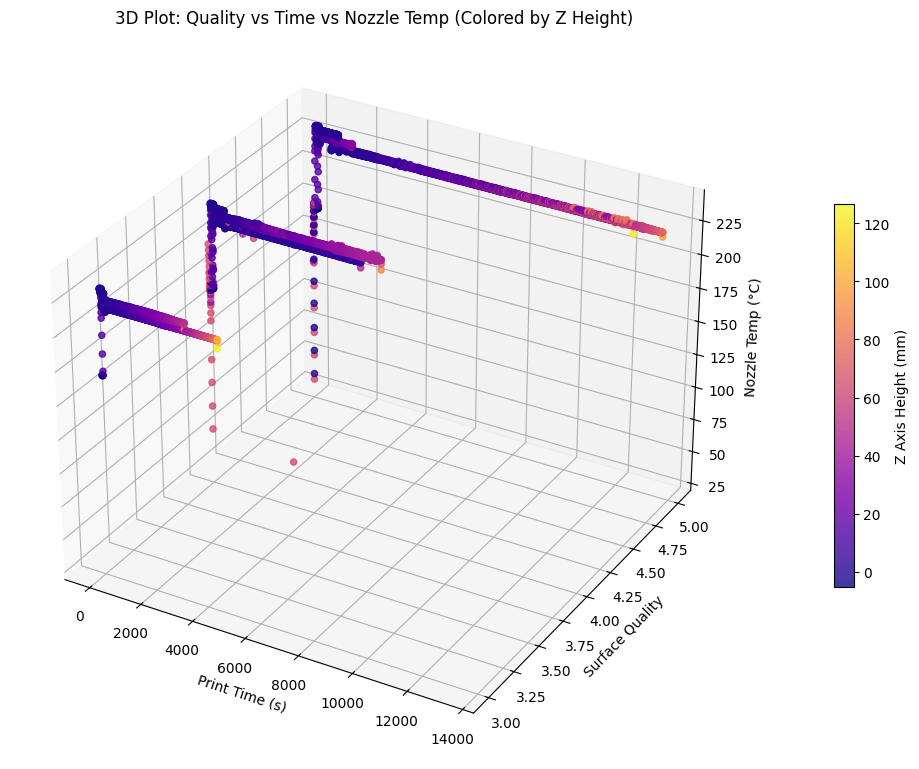

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df_filtered["job/time_printing"],
    df_filtered["surface_quality"],
    df_filtered["printer/temp_nozzle"],
    c=df_filtered["printer/axis_z"],
    cmap="plasma",
    alpha=0.8
)

ax.set_xlabel("Print Time (s)")
ax.set_ylabel("Surface Quality")
ax.set_zlabel("Nozzle Temp (°C)")
ax.set_title("3D Plot: Quality vs Time vs Nozzle Temp (Colored by Z Height)")

# Colorbar for Z axis height
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, pad=0.1)
cbar.set_label("Z Axis Height (mm)")

plt.tight_layout()
plt.show()


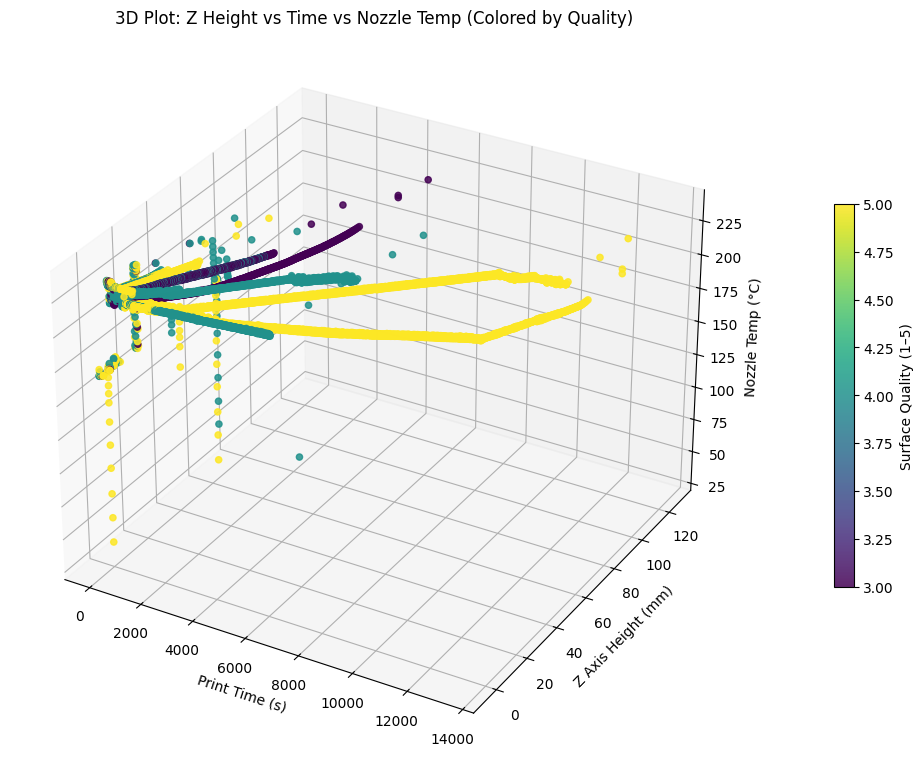

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter where color = surface quality and Z = axis_z
sc = ax.scatter(
    df_filtered["job/time_printing"],
    df_filtered["printer/axis_z"],
    df_filtered["printer/temp_nozzle"],
    c=df_filtered["surface_quality"],
    cmap="viridis",  # or "plasma" if you prefer
    alpha=0.85
)

ax.set_xlabel("Print Time (s)")
ax.set_ylabel("Z Axis Height (mm)")
ax.set_zlabel("Nozzle Temp (°C)")
ax.set_title("3D Plot: Z Height vs Time vs Nozzle Temp (Colored by Quality)")

# Colorbar for surface quality
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, pad=0.1)
cbar.set_label("Surface Quality (1–5)")

plt.tight_layout()
plt.show()